<a href="https://colab.research.google.com/github/Matheus-Pombeiro/gun_violence_us/blob/main/gun_violence_us.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gun Violence in the US**

By Matheus Pombeiro

## Initial settings

In [35]:
# Impoting Pandas
import pandas as pd

# Importing Numpy
import numpy as np

In [36]:
# Getting the dataset url
url = 'https://raw.githubusercontent.com/Matheus-Pombeiro/gun_violence_us/refs/heads/main/assets/datasets/gun_violence_us.csv'

In [37]:
# Reading the dataset
data = pd.read_csv(url)

# Showing the first three rows
data.head(3)

,Incident ID,Incident Date,State,City Or County,Address,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Operations,Latitude,Longitude,Coordinates_Found
0,3052758,"October 21, 2024",Washington,Fall City,7700 block of Lake Alice Rd SE,5,1,0,0,1,NaN,47.56812,-121.89086,Yes
1,3052028,"October 20, 2024",Tennessee,Jackson,2310 N Highland Ave,1,8,0,0,0,NaN,35.61390,-88.81940,Yes
2,3051984,"October 20, 2024",Louisiana,Baton Rouge,9700 block of Greenwell Springs Rd,0,5,0,0,0,NaN,30.44335,-91.18664,Yes


In [38]:
# Setting the index
data.set_index('Incident ID', inplace=True)

# Showing the first three rows
data.head(3)

,Incident Date,State,City Or County,Address,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Operations,Latitude,Longitude,Coordinates_Found
Incident ID,,,,,,,,,,,,,
3052758,"October 21, 2024",Washington,Fall City,7700 block of Lake Alice Rd SE,5,1,0,0,1,NaN,47.56812,-121.89086,Yes
3052028,"October 20, 2024",Tennessee,Jackson,2310 N Highland Ave,1,8,0,0,0,NaN,35.61390,-88.81940,Yes
3051984,"October 20, 2024",Louisiana,Baton Rouge,9700 block of Greenwell Springs Rd,0,5,0,0,0,NaN,30.44335,-91.18664,Yes


## Extracting information

In [39]:
# Dataset shape (rows / columns)
data.shape

(427, 13)

In [40]:
# Dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 427 entries, 3052758 to 2840907
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Incident Date      427 non-null    object 
 1   State              427 non-null    object 
 2   City Or County     427 non-null    object 
 3   Address            426 non-null    object 
 4   Victims Killed     427 non-null    int64  
 5   Victims Injured    427 non-null    int64  
 6   Suspects Killed    427 non-null    int64  
 7   Suspects Injured   427 non-null    int64  
 8   Suspects Arrested  427 non-null    int64  
 9   Operations         0 non-null      float64
 10  Latitude           427 non-null    float64
 11  Longitude          427 non-null    float64
 12  Coordinates_Found  427 non-null    object 
dtypes: float64(3), int64(5), object(5)
memory usage: 46.7+ KB


In [41]:
# Dataset statistic values
data.describe()

,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Operations,Latitude,Longitude
count,427.000000,427.000000,427.000000,427.000000,427.000000,0.0,427.000000,427.000000
mean,1.000000,4.437939,0.070258,0.063232,0.711944,NaN,36.941819,-88.791959
std,1.210285,2.849555,0.264896,0.271030,1.178414,NaN,4.934289,12.976850
min,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,21.449910,-166.739450
25%,0.000000,3.000000,0.000000,0.000000,0.000000,NaN,33.449545,-91.910580
50%,1.000000,4.000000,0.000000,0.000000,0.000000,NaN,37.687490,-86.811790
75%,1.000000,5.000000,0.000000,0.000000,1.000000,NaN,40.692450,-80.735325
max,8.000000,28.000000,2.000000,2.000000,7.000000,NaN,68.349440,-70.256650


## Places and month with most incidents

In [42]:
# Counting the record number of the mode 'State' column
data['State'].value_counts().head(1)

,count
State,
Illinois,32


In [43]:
# Counting the record number of the mode 'City Or County' column
data['City Or County'].value_counts().head(1)

,count
City Or County,
Chicago,25


In [44]:
# Transforming the datetime format
data['Incident Date'] = pd.to_datetime(data['Incident Date'])

# Showing the new 'Incident Date' column
data['Incident Date'].head(3)

,Incident Date
Incident ID,
3052758,2024-10-21
3052028,2024-10-20
3051984,2024-10-20


In [45]:
# Extracting the only months
months = pd.to_datetime(data['Incident Date']).dt.month

# Showing the months dataframe (from 1 == January to 10 == October)
months.head(3)

,Incident Date
Incident ID,
3052758,10
3052028,10
3051984,10


In [46]:
# Adding a new column with the months of occurrences
data['Months of Occurrence'] = months

# Showing the new dataframe
data.head(3)

,Incident Date,State,City Or County,Address,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Operations,Latitude,Longitude,Coordinates_Found,Months of Occurrence
Incident ID,,,,,,,,,,,,,,
3052758,2024-10-21,Washington,Fall City,7700 block of Lake Alice Rd SE,5,1,0,0,1,NaN,47.56812,-121.89086,Yes,10
3052028,2024-10-20,Tennessee,Jackson,2310 N Highland Ave,1,8,0,0,0,NaN,35.61390,-88.81940,Yes,10
3051984,2024-10-20,Louisiana,Baton Rouge,9700 block of Greenwell Springs Rd,0,5,0,0,0,NaN,30.44335,-91.18664,Yes,10


In [47]:
# Finding the month with the most occurrences in Illinois and Chicago
data.query('`State` == "Illinois" & `City Or County` == "Chicago"')['Months of Occurrence'].mode()

,Months of Occurrence
0,7


In [48]:
# Converting the type of 'Months of Occurrence' column
data['Months of Occurrence'] = data['Months of Occurrence'].astype(np.int64)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 427 entries, 3052758 to 2840907
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Incident Date         427 non-null    datetime64[ns]
 1   State                 427 non-null    object        
 2   City Or County        427 non-null    object        
 3   Address               426 non-null    object        
 4   Victims Killed        427 non-null    int64         
 5   Victims Injured       427 non-null    int64         
 6   Suspects Killed       427 non-null    int64         
 7   Suspects Injured      427 non-null    int64         
 8   Suspects Arrested     427 non-null    int64         
 9   Operations            0 non-null      float64       
 10  Latitude              427 non-null    float64       
 11  Longitude             427 non-null    float64       
 12  Coordinates_Found     427 non-null    object        
 13  Months of Occur

In [49]:
# Finding the timeline of incidents in Illinois
illinois_months = data[data['State'] == 'Illinois'].groupby('Months of Occurrence')['Months of Occurrence'].value_counts()
illinois_months

,count
Months of Occurrence,
1,3
2,3
3,2
4,2
5,4
6,4
7,6
8,4
9,4


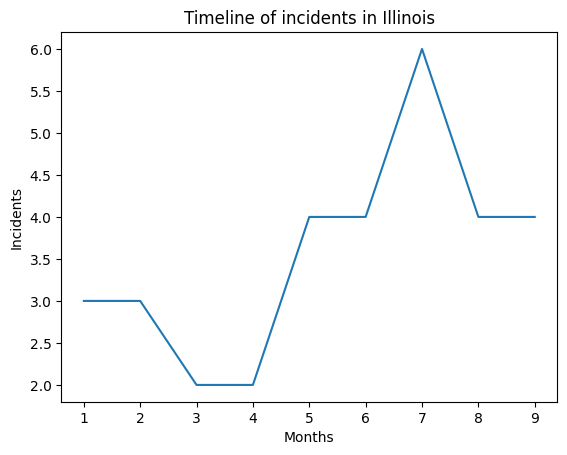

In [50]:
# Plotting a chart about the timeline of incidents in Illinois
illinois_months.plot(kind='line', title='Timeline of incidents in Illinois', xlabel='Months', ylabel='Incidents');

In [51]:
# Finding the timeline of incidents in Chicago
chicago_months = data[data['City Or County'] == 'Chicago'].groupby('Months of Occurrence')['Months of Occurrence'].value_counts()

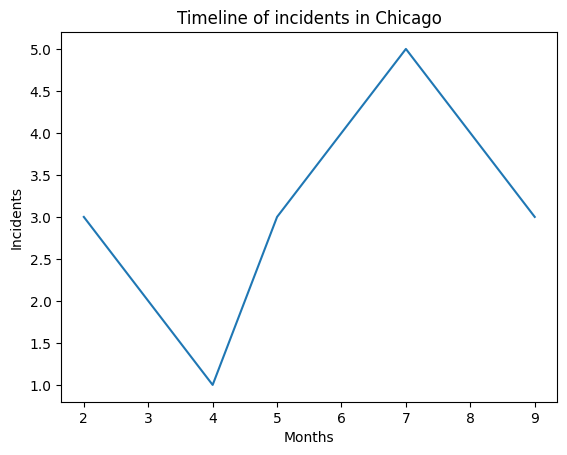

In [52]:
# Plotting a chart about the timeline of incidents in Chicago
chicago_months.plot(kind='line', title='Timeline of incidents in Chicago', xlabel='Months', ylabel='Incidents');

## Number of victims and suspects killed

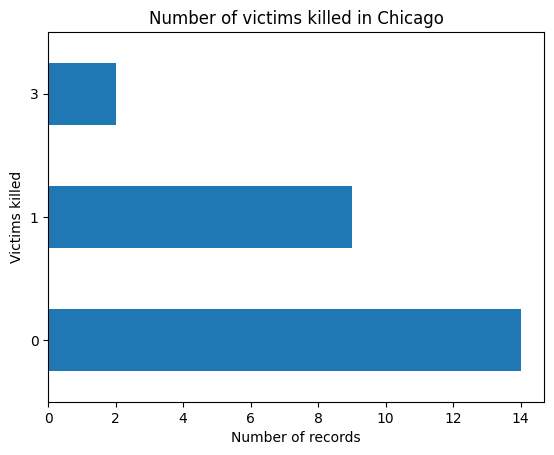

In [53]:
# Plotting a chart about the number of victims killed in Chicago
data.query('`City Or County` == "Chicago"')['Victims Killed'].value_counts().plot(kind='barh',\
                                                                                    title='Number of victims killed in Chicago',\
                                                                                    xlabel='Number of records',\
                                                                                    ylabel='Victims killed');

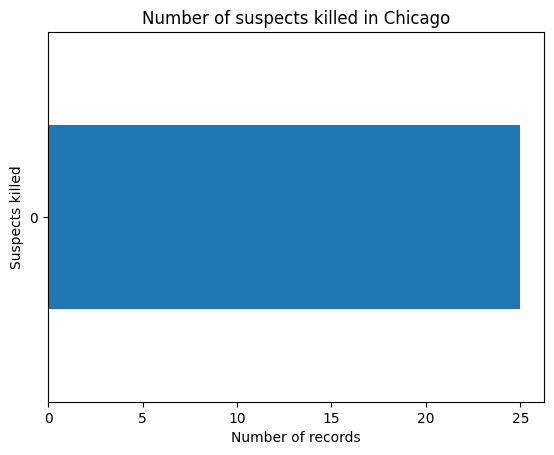

In [54]:
# Plotting a chart about the number of suspects killed in Chicago
data.query('`City Or County` == "Chicago"')['Suspects Killed'].value_counts().plot(kind='barh',\
                                                                                   title='Number of suspects killed in Chicago',\
                                                                                   xlabel='Number of records',\
                                                                                   ylabel='Suspects killed');

## About suspects in Chicago

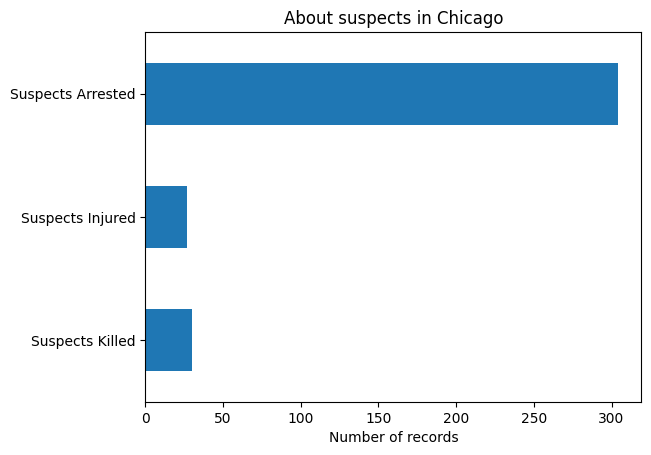

In [63]:
# Plotting a chart about suspects in Chicago
data[['Suspects Killed', 'Suspects Injured', 'Suspects Arrested']].sum().plot(kind='barh',\
                                                                              title='About suspects in Chicago',\
                                                                              xlabel='Number of records');